# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from wordcloud import WordCloud
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Importing data

In [2]:
#Loading the data
df = pd.read_csv("C:\\Users\\Ekta\\Downloads\\logs.csv")

In [3]:
# Convert timestamps to readable format
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ns')

In [4]:
df.head()

,timestamp,observed_timestamp,id,trace_id,span_id,trace_flags,severity_text,severity_number,body,resources_string_key,resources_string_value,attributes_string_key,attributes_string_value,attributes_int64_key,attributes_int64_value,attributes_float64_key,attributes_float64_value,attributes_bool_key,attributes_bool_value
0,2024-05-03 15:27:23,1714750043213385385,2fxVpIEdOkEKkTsSs1rPt7FEH2u,NaN,NaN,0,NaN,0,"[2024-05-03 15:27:23,209] INFO [Controller 1] ...",[],[],"['container_id','container_name']","['opsfree','kafka']",[],[],[],[],[],[]
1,2024-05-03 15:27:23,1714750043215915002,2fxVpIEdOkEKkTsSs1rPt7FEH2v,NaN,NaN,0,NaN,0,"[2024-05-03 15:27:23,212] INFO [Controller 1] ...",[],[],"['container_name','container_id']","['kafka','opsfree']",[],[],[],[],[],[]
2,2024-05-03 15:27:23,1714750043216028292,2fxVpIEdOkEKkTsSs1rPt7FEH2w,NaN,NaN,0,NaN,0,"[2024-05-03 15:27:23,212] INFO [Controller 1] ...",[],[],"['container_id','container_name']","['opsfree','kafka']",[],[],[],[],[],[]
3,2024-05-03 15:27:23,1714750043216760392,2fxVpIEdOkEKkTsSs1rPt7FEH2x,NaN,NaN,0,NaN,0,"[2024-05-03 15:27:23,212] INFO [Controller 1] ...",[],[],"['container_id','container_name']","['opsfree','kafka']",[],[],[],[],[],[]
4,2024-05-03 15:27:23,1714750043216854493,2fxVpIEdOkEKkTsSs1rPt7FEH2y,NaN,NaN,0,NaN,0,"[2024-05-03 15:27:23,212] INFO [Controller 1] ...",[],[],"['container_id','container_name']","['opsfree','kafka']",[],[],[],[],[],[]


In [6]:
# Check the columns and strip any leading/trailing spaces
df.columns = df.columns.str.strip()

# Print the columns to verify
print(df.columns)

# Ensure the column name is correctly accessed
df['observed_timestamp'] = pd.to_datetime(df['observed_timestamp'], unit='ns')


Index(['timestamp', 'observed_timestamp', 'id', 'trace_id', 'span_id',
       'trace_flags', 'severity_text', 'severity_number', 'body',
       'resources_string_key', 'resources_string_value',
       'attributes_string_key', 'attributes_string_value',
       'attributes_int64_key', 'attributes_int64_value',
       'attributes_float64_key', 'attributes_float64_value',
       'attributes_bool_key', 'attributes_bool_value'],
      dtype='object')


In [7]:
df.head()

,timestamp,observed_timestamp,id,trace_id,span_id,trace_flags,severity_text,severity_number,body,resources_string_key,resources_string_value,attributes_string_key,attributes_string_value,attributes_int64_key,attributes_int64_value,attributes_float64_key,attributes_float64_value,attributes_bool_key,attributes_bool_value
0,2024-05-03 15:27:23,2024-05-03 15:27:23.213385385,2fxVpIEdOkEKkTsSs1rPt7FEH2u,NaN,NaN,0,NaN,0,"[2024-05-03 15:27:23,209] INFO [Controller 1] ...",[],[],"['container_id','container_name']","['opsfree','kafka']",[],[],[],[],[],[]
1,2024-05-03 15:27:23,2024-05-03 15:27:23.215915002,2fxVpIEdOkEKkTsSs1rPt7FEH2v,NaN,NaN,0,NaN,0,"[2024-05-03 15:27:23,212] INFO [Controller 1] ...",[],[],"['container_name','container_id']","['kafka','opsfree']",[],[],[],[],[],[]
2,2024-05-03 15:27:23,2024-05-03 15:27:23.216028292,2fxVpIEdOkEKkTsSs1rPt7FEH2w,NaN,NaN,0,NaN,0,"[2024-05-03 15:27:23,212] INFO [Controller 1] ...",[],[],"['container_id','container_name']","['opsfree','kafka']",[],[],[],[],[],[]
3,2024-05-03 15:27:23,2024-05-03 15:27:23.216760392,2fxVpIEdOkEKkTsSs1rPt7FEH2x,NaN,NaN,0,NaN,0,"[2024-05-03 15:27:23,212] INFO [Controller 1] ...",[],[],"['container_id','container_name']","['opsfree','kafka']",[],[],[],[],[],[]
4,2024-05-03 15:27:23,2024-05-03 15:27:23.216854493,2fxVpIEdOkEKkTsSs1rPt7FEH2y,NaN,NaN,0,NaN,0,"[2024-05-03 15:27:23,212] INFO [Controller 1] ...",[],[],"['container_id','container_name']","['opsfree','kafka']",[],[],[],[],[],[]


In [8]:
# Sorting the data by timestamp
df = df.sort_values(by='timestamp')

In [9]:
# Basic statistical overview of the data
print(df.describe(include='all'))

                            timestamp             observed_timestamp  \
count                          134961                         134961   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    2024-05-03 14:39:00.462740224  2024-05-03 14:39:01.467735296   
min               2024-05-03 13:28:20  2024-05-03 13:28:20.234460331   
25%               2024-05-03 14:18:16  2024-05-03 14:18:16.901005568   
50%               2024-05-03 14:46:29  2024-05-03 14:46:29.902290176   
75%               2024-05-03 14:58:41  2024-05-03 14:58:43.206360320   
max               2024-05-03 15:28:02  2024-05-03 15:28:02.232925545   
std                               NaN                            NaN   

                                 id                          trace_id  \
count                        134961                           

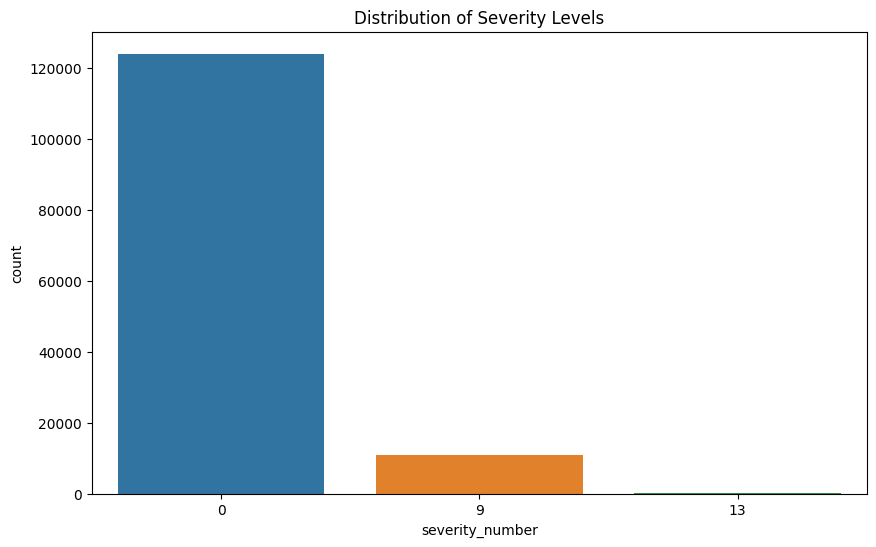

In [10]:
# Plotting distribution of severity levels
plt.figure(figsize=(10, 6))
sns.countplot(x='severity_number', data=df)
plt.title('Distribution of Severity Levels')
plt.show()

In [11]:
# Analyzing 'body' using NLP
# Basic text preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)  # remove text in brackets
    text = re.sub(r'\W', ' ', text)  # remove non-alphanumeric characters
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    return text

In [12]:
#Applying the function
df['clean_body'] = df['body'].apply(lambda x: preprocess_text(str(x)))

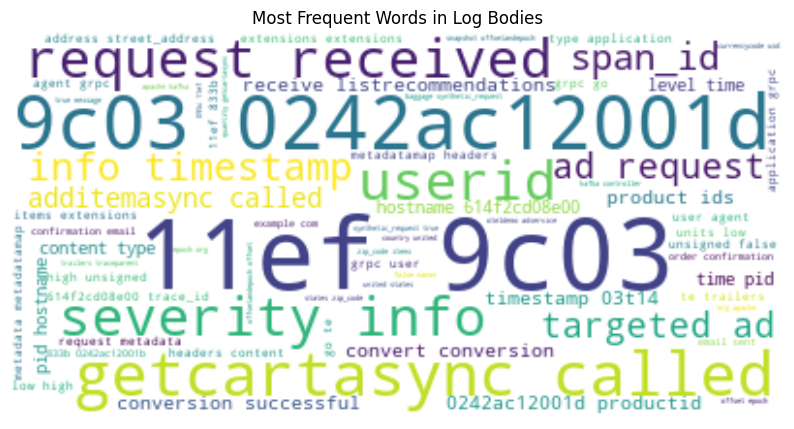

In [13]:
# WordCloud to visualize the most frequent words in the 'body' column
text = ' '.join(df['clean_body'])
wordcloud = WordCloud(stopwords=stopwords.words('english'), background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Log Bodies')
plt.show()

In [14]:
# Most common bigrams (pair of words) in the body
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigrams = vectorizer.fit_transform(df['clean_body'])
sum_bigrams = bigrams.sum(axis=0)
bigrams_freq = [(word, sum_bigrams[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
bigrams_freq = sorted(bigrams_freq, key=lambda x: x[1], reverse=True)

print("Most common bigrams:")
for bigram, freq in bigrams_freq[:10]:
    print(f"{bigram}: {freq}")

Most common bigrams:
2024 05: 33558
called userid: 32655
11ef 9c03: 29373
9c03 0242ac12001d: 29373
05 03: 19795
getcartasync called: 18922
timestamp 2024: 17072
request received: 13869
severity info: 13673
info timestamp: 13673


In [15]:
import ast

# Ensure columns are trimmed of any leading/trailing whitespace
df.columns = df.columns.str.strip()

# Combining attributes_string_key and attributes_string_value
def combine_attributes(row):
    try:
        keys = ast.literal_eval(row['attributes_string_key'])
        values = ast.literal_eval(row['attributes_string_value'])
        combined = keys + values
        return ' '.join(combined)
    except (ValueError, SyntaxError):
        return ''  # Return an empty string in case of an error

# Apply the function to combine attributes
df['attributes_combined'] = df.apply(combine_attributes, axis=1)

# Display the first few rows to check the results
df[['attributes_string_key', 'attributes_string_value', 'attributes_combined']].head()


,attributes_string_key,attributes_string_value,attributes_combined
232,"['container_id','container_name']","['opsfree','kafka']",container_id container_name opsfree kafka
261,"['container_id','container_name']","['opsfree','kafka']",container_id container_name opsfree kafka
260,"['container_name','container_id']","['kafka','opsfree']",container_name container_id kafka opsfree
259,"['container_id','container_name']","['opsfree','kafka']",container_id container_name opsfree kafka
258,"['container_id','container_name']","['opsfree','kafka']",container_id container_name opsfree kafka


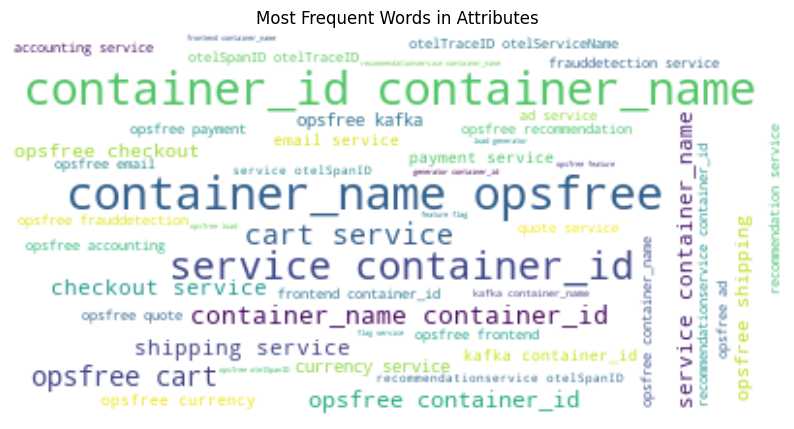

In [16]:
# WordCloud to visualize the most frequent words in the 'attributes_combined' column
text = ' '.join(df['attributes_combined'])
wordcloud = WordCloud(stopwords=stopwords.words('english'), background_color='white').generate(text)

#plotting the figure
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Attributes')
plt.show()

# Anomaly Detection Algorithm (Isolation Forest)

In [17]:
# Importing libraries
from sklearn.ensemble import IsolationForest
import numpy as np

In [18]:
# Convert 'body' column to numerical features using CountVectorizer
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['clean_body']).toarray()

In [19]:
# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['anomaly_iforest'] = iso_forest.fit_predict(X)

In [20]:
# -1 indicates an anomaly, 1 indicates normal
anomalies_iforest = df[df['anomaly_iforest'] == -1]
print(f"Number of anomalies detected by Isolation Forest: {len(anomalies_iforest)}")

Number of anomalies detected by Isolation Forest: 1350


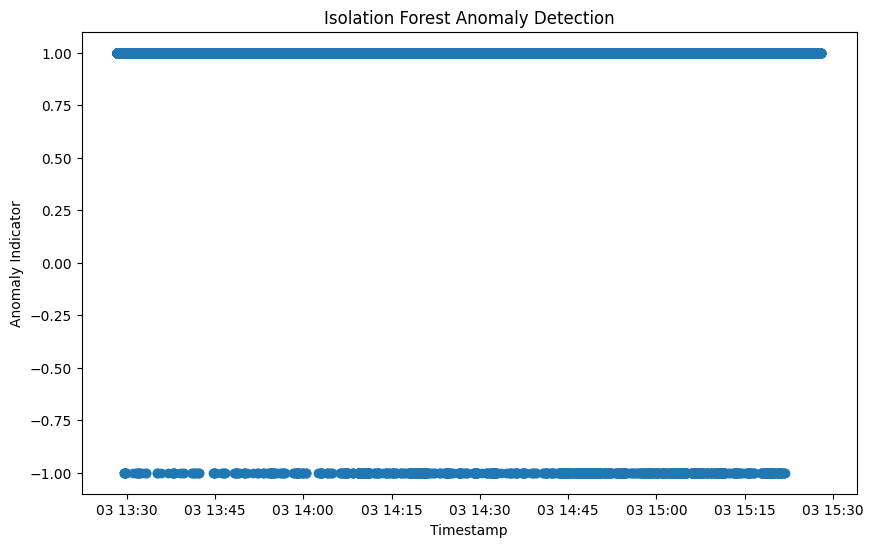

In [21]:
# Plotting the anomalies over time
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['anomaly_iforest'], marker='o', linestyle='None')
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Timestamp')
plt.ylabel('Anomaly Indicator')
plt.show()

### Q. What algorithm, machine learning or AI approaches would you use to find
### anomalies in log data? And why do you think that approach is a good approach?

### Ans: 
### To find anomalies in log data, the choice of algorithm or machine learning (ML)/AI approach depends on the nature of the data, the specific type of anomalies you are trying to detect, and the computational resources available. Here are some approaches that are commonly used:

### Anomaly Detection in Log Data Using Isolation Forest
### Algorithm Overview:
### Isolation Forest is a popular algorithm for anomaly detection, particularly in scenarios where data points deviate significantly from the norm. It is a tree-based method that identifies anomalies by isolating observations through recursive partitioning. The key idea behind Isolation Forest is that anomalies are "few and different," so they are easier to isolate.

### Why Isolation Forest is a Good Approach:

### 1. Efficiency and Scalability:

### Isolation Forest is computationally efficient and can handle large datasets, making it suitable for processing extensive log data.
### It works well in high-dimensional spaces, which is particularly useful when dealing with log data that may have numerous features after preprocessing.

### 2. Unsupervised Learning:

### One of the significant advantages of Isolation Forest is that it doesn't require labeled data. In most real-world scenarios, especially with log data, labeled anomalies are rare. Isolation Forest can detect anomalies without needing a predefined set of normal and anomalous data.

### 3. Works Well with Non-Parametric Data:

### Unlike many other anomaly detection techniques that assume a particular distribution of data (e.g., Gaussian distribution), Isolation Forest makes no such assumptions. This flexibility makes it more robust to different types of log data.

### 4. Interpretability:

### The model's decision process (isolating anomalies based on shorter paths in the trees) is relatively intuitive, making it easier to explain the rationale behind detecting a particular log entry as anomalous. Anomalies are detected because they require fewer splits to be isolated, meaning they are in some way distinct from the bulk of the data.

### Limitations and Considerations:
### While Isolation Forest is a powerful tool, it does have some limitations. For example, it may not be as effective if the anomalies are subtle and not significantly different from normal data. Additionally, tuning parameters such as the contamination factor (the proportion of anomalies in the data) is crucial for achieving optimal results.